## Find all shares that are included in DJI

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import pandas_datareader.data as web
import datetime

In [6]:
path='https://finance.yahoo.com/quote/%5EDJI/components?p=%5EDJI'
df_dji=pd.read_html(path)[0]
df_dji.head()

,Symbol,Company Name,Last Price,Change,% Change,Volume
0,JNJ,Johnson & Johnson,128.91,-0.02,-0.02%,2514639
1,UTX,United Technologies Corporation,109.21,-0.11,-0.10%,1597947
2,IBM,International Business Machines Corporation,120.87,0.18,+0.15%,1783121
3,PG,The Procter & Gamble Company,91.15,0.20,+0.22%,4451263
4,MCD,McDonald's Corporation,180.84,0.55,+0.30%,883006


In [12]:
ticker_dji=df_dji['Symbol'].values
ticker_dji

array(['JNJ', 'UTX', 'IBM', 'PG', 'MCD', 'VZ', 'WBA', 'MMM', 'WMT', 'TRV',
       'INTC', 'KO', 'UNH', 'AAPL', 'NKE', 'GS', 'V', 'DIS', 'CAT', 'JPM',
       'CVX', 'DWDP', 'AXP', 'HD', 'CSCO', 'XOM', 'MSFT', 'BA', 'MRK',
       'PFE'], dtype=object)

In [14]:
ticker_dji.shape[0] == df_dji.shape[0]

True

In [15]:
start=datetime.datetime(2017,1,1)
finish=datetime.datetime(2017,12,31)

In [18]:
web.DataReader('IBM', 'yahoo', start, finish).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,167.869995,166.009995,167.000000,167.190002,2934300.0,153.982513
2017-01-04,169.869995,167.360001,167.770004,169.259995,3381400.0,155.888931
2017-01-05,169.389999,167.259995,169.250000,168.699997,2682300.0,155.373169
2017-01-06,169.919998,167.520004,168.690002,169.529999,2945500.0,156.137619
2017-01-09,169.800003,167.619995,169.470001,167.649994,3184700.0,154.406113


In [ ]:
df_close={ }
for i in ticker_dji:
    df_close[i]=web.DataReader(i, 'yahoo', start, finish)['Close']

In [22]:
df_close = pd.DataFrame(df_close)
df_close.head()

,JNJ,UTX,IBM,PG,MCD,VZ,WBA,MMM,WMT,TRV,...,CVX,DWDP,AXP,HD,CSCO,XOM,MSFT,BA,MRK,PFE
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,115.839996,110.830002,167.190002,84.199997,119.620003,54.580002,82.959999,178.050003,68.660004,120.900002,...,117.849998,57.599998,75.349998,134.309998,30.540001,90.889999,62.580002,156.970001,60.150002,33.000000
2017-01-04,115.650002,110.900002,169.259995,84.500000,119.480003,54.520000,82.980003,178.320007,69.059998,120.250000,...,117.820000,58.060001,76.260002,135.500000,30.100000,89.889999,62.299999,158.619995,60.130001,33.290001
2017-01-05,116.860001,111.349998,168.699997,85.059998,119.699997,54.639999,83.029999,177.710007,69.209999,118.330002,...,117.309998,57.799999,75.320000,133.899994,30.170000,88.550003,62.299999,158.710007,60.110001,33.610001
2017-01-06,116.300003,112.550003,169.529999,85.029999,120.760002,53.259998,83.099998,178.229996,68.260002,118.269997,...,116.839996,57.439999,75.470001,133.529999,30.230000,88.500000,62.840000,159.100006,60.270000,33.480000
2017-01-09,116.279999,111.500000,167.649994,84.400002,120.430000,52.680000,82.550003,177.270004,68.709999,117.320000,...,115.839996,57.790001,75.860001,134.309998,30.180000,87.040001,62.639999,158.320007,61.099998,33.470001


In [23]:
df_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 30 columns):
JNJ     251 non-null float64
UTX     251 non-null float64
IBM     251 non-null float64
PG      251 non-null float64
MCD     251 non-null float64
VZ      251 non-null float64
WBA     251 non-null float64
MMM     251 non-null float64
WMT     251 non-null float64
TRV     251 non-null float64
INTC    251 non-null float64
KO      251 non-null float64
UNH     251 non-null float64
AAPL    251 non-null float64
NKE     251 non-null float64
GS      251 non-null float64
V       251 non-null float64
DIS     251 non-null float64
CAT     251 non-null float64
JPM     251 non-null float64
CVX     251 non-null float64
DWDP    251 non-null float64
AXP     251 non-null float64
HD      251 non-null float64
CSCO    251 non-null float64
XOM     251 non-null float64
MSFT    251 non-null float64
BA      251 non-null float64
MRK     251 non-null float64
PFE     251 non-null float64
dtypes

In [24]:
df_corr=df_close.corr()
df_corr

,JNJ,UTX,IBM,PG,MCD,VZ,WBA,MMM,WMT,TRV,...,CVX,DWDP,AXP,HD,CSCO,XOM,MSFT,BA,MRK,PFE
JNJ,1.000000,0.690988,-0.671870,0.378629,0.931374,-0.167913,-0.758278,0.946110,0.855269,0.867210,...,0.278877,0.858487,0.852504,0.822967,0.538750,-0.312055,0.886025,0.874595,-0.454983,0.709913
UTX,0.690988,1.000000,-0.567195,-0.051325,0.725071,-0.282825,-0.495472,0.710712,0.637183,0.695238,...,-0.001971,0.474013,0.541921,0.674379,0.387593,-0.119570,0.628384,0.532211,-0.333266,0.306522
IBM,-0.671870,-0.567195,1.000000,-0.248412,-0.813008,0.347259,0.432229,-0.625330,-0.577457,-0.445886,...,-0.014172,-0.493801,-0.531019,-0.502358,-0.013452,0.502532,-0.634837,-0.670990,0.198371,-0.258071
PG,0.378629,-0.051325,-0.248412,1.000000,0.328032,0.199870,-0.058712,0.264884,0.258709,0.198054,...,0.201912,0.446451,0.361232,0.320492,0.295349,-0.566424,0.271076,0.482490,0.159559,0.470191
MCD,0.931374,0.725071,-0.813008,0.328032,1.000000,-0.207978,-0.764984,0.940364,0.894924,0.810184,...,0.311583,0.830065,0.873039,0.848303,0.477842,-0.350549,0.933236,0.917664,-0.495612,0.616180
VZ,-0.167913,-0.282825,0.347259,0.199870,-0.207978,1.000000,-0.000277,-0.079530,0.066406,0.001759,...,0.656173,0.017423,0.128395,0.090668,0.317526,0.458508,-0.015449,0.101235,-0.205943,0.282749
WBA,-0.758278,-0.495472,0.432229,-0.058712,-0.764984,-0.000277,1.000000,-0.825000,-0.787924,-0.775561,...,-0.582003,-0.799799,-0.854179,-0.709001,-0.470762,-0.115617,-0.841952,-0.789448,0.655920,-0.658259
MMM,0.946110,0.710712,-0.625330,0.264884,0.940364,-0.079530,-0.825000,1.000000,0.937787,0.887952,...,0.428168,0.891973,0.924790,0.920958,0.658022,-0.153791,0.954986,0.905799,-0.619071,0.744824
WMT,0.855269,0.637183,-0.577457,0.258709,0.894924,0.066406,-0.787924,0.937787,1.000000,0.856661,...,0.530265,0.828357,0.907503,0.931511,0.725143,-0.100017,0.957966,0.904515,-0.727349,0.711595
TRV,0.867210,0.695238,-0.445886,0.198054,0.810184,0.001759,-0.775561,0.887952,0.856661,1.000000,...,0.392920,0.742259,0.843350,0.786214,0.605924,-0.064399,0.846934,0.792883,-0.644306,0.613495


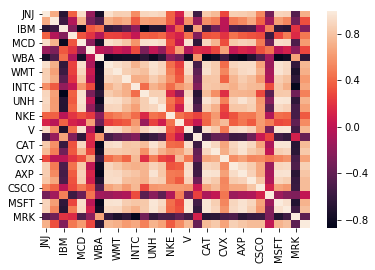

In [25]:
sns.heatmap(df_corr)

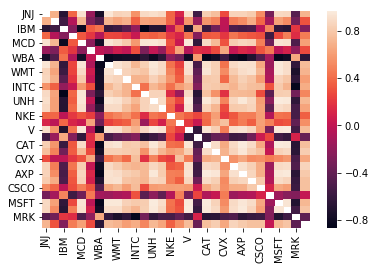

In [29]:
sns.heatmap(df_corr.replace(1,np.nan))

In [34]:
df_graph=(abs(df_corr.replace(1,0))>0.8).astype(int)
df_graph.head()

,JNJ,UTX,IBM,PG,MCD,VZ,WBA,MMM,WMT,TRV,...,CVX,DWDP,AXP,HD,CSCO,XOM,MSFT,BA,MRK,PFE
JNJ,0,0,0,0,1,0,0,1,1,1,...,0,1,1,1,0,0,1,1,0,0
UTX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
IBM,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MCD,1,0,1,0,0,0,0,1,1,1,...,0,1,1,1,0,0,1,1,0,0


/home/xenakas/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


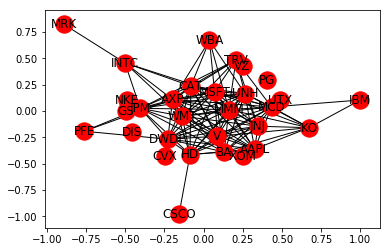

In [37]:
m=df_graph.values
n=ticker_dji
G=nx.from_numpy_matrix(m)
G=nx.relabel_nodes(G, dict(zip(G.nodes(),n)))
nx.draw_networkx(G, pos= nx.kamada_kawai_layout(G1))

In [39]:
cliques=list(nx.find_cliques(G)) #a small close-knit group
cliques

[['GS'],
 ['MRK', 'INTC'],
 ['DIS'],
 ['IBM', 'KO', 'MCD'],
 ['UTX'],
 ['CVX'],
 ['MSFT', 'MMM', 'UNH', 'CAT', 'AXP', 'WBA'],
 ['MSFT',
  'MMM',
  'UNH',
  'CAT',
  'AXP',
  'WMT',
  'JNJ',
  'MCD',
  'HD',
  'BA',
  'DWDP',
  'V',
  'AAPL'],
 ['MSFT', 'MMM', 'UNH', 'CAT', 'AXP', 'WMT', 'JNJ', 'MCD', 'TRV'],
 ['MSFT', 'MMM', 'UNH', 'CAT', 'AXP', 'WMT', 'JPM', 'HD', 'BA', 'DWDP', 'V'],
 ['MSFT', 'MMM', 'UNH', 'CAT', 'AXP', 'WMT', 'JPM', 'TRV'],
 ['MSFT', 'MMM', 'UNH', 'KO', 'JNJ', 'BA', 'V', 'AAPL', 'MCD'],
 ['MSFT', 'INTC', 'CAT', 'WMT', 'AXP', 'JPM'],
 ['PG'],
 ['PFE', 'AXP', 'DWDP', 'JPM'],
 ['CSCO', 'HD'],
 ['NKE'],
 ['VZ'],
 ['XOM']]

In [41]:
mq=max(cliques, key=len)
mq

['MSFT',
 'MMM',
 'UNH',
 'CAT',
 'AXP',
 'WMT',
 'JNJ',
 'MCD',
 'HD',
 'BA',
 'DWDP',
 'V',
 'AAPL']

In [43]:
df_dji[df_dji['Symbol'].isin(mq)]['Company Name'].values

array(['Johnson & Johnson', "McDonald's Corporation", '3M Company',
       'Walmart Inc.', 'UnitedHealth Group Incorporated', 'Apple Inc.',
       'Visa Inc.', 'Caterpillar Inc.', 'DowDuPont Inc.',
       'American Express Company', 'The Home Depot, Inc.',
       'Microsoft Corporation', 'The Boeing Company'], dtype=object)